In [10]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

In [11]:
def read_pixels(folder, verbose = False):
  '''
    Reads 3-D pixel value of the top left corner of each image in folder
    and returns an n x 3 matrix X containing the pixel values 
  '''  
  n = len(next(os.walk(folder))[2]) # number of files
  
  X = np.empty([n, 3])
  i = 0
  
  if verbose:
    fig, ax = plt.subplots()
    h = ax.imshow(np.random.randint(255, size=(28,28,3)).astype('uint8'))
  
  for filename in os.listdir(folder):  
    # read image
    # img = plt.imread(os.path.join(folder,filename), 0)
    img = cv2.imread(os.path.join(folder,filename))
    # convert from BGR (opencv convention) to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # store pixel rgb value
    X[i] = img[0,0].astype(np.float64)/255
    i += 1
    
    # display
    if verbose:
      h.set_data(img)
      ax.set_title(filename)
      fig.canvas.flush_events()
      plt.show()

  return X

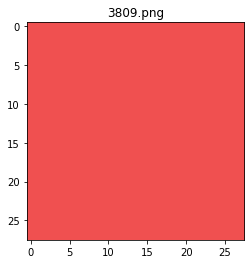

[[0.94117647 0.31372549 0.31372549]
 [0.94117647 0.78431373 0.54509804]
 [0.31372549 0.07843137 0.07843137]
 ...
 [0.35686275 0.39215686 0.56078431]
 [0.34901961 0.62745098 0.94117647]
 [0.19215686 0.54901961 0.85882353]] [1 1 1 ... 3 3 3]
3694


In [19]:
if __name__ == '__main__':
  folder = 'data/training'
  X1 = read_pixels(folder+'/red', verbose = True)
  X2 = read_pixels(folder+'/green')
  X3 = read_pixels(folder+'/blue')
  y1, y2, y3 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), np.full(X3.shape[0],3)
  X, y = np.concatenate((X1,X2,X3)), np.concatenate((y1,y2,y3))

  print(X,y)
  print(len(X))
 

  

In [15]:
# import pandas as pd


In [18]:
theta = [len(y1)/len(y),len(y2)/len(y),len(y3)/len(y)]


[0.36599891716296695, 0.3245804006497022, 0.3094206821873308]


In [20]:
print(y)

[1 1 1 ... 3 3 3]


In [35]:
y1 = list()
y2 = list()
y3 = list()
for i in range(len(y)):
    if y[i]==1:
        y1.append(y[i])
    elif y[i] == 2:
        y2.append(y[i])
    elif y[i] == 3:
        y3.append(y[i])
# print(y1)
# print(y2)
# print(y3)
theta = [len(y1)/len(y),len(y2)/len(y),len(y3)/len(y)]
mu = [np.average(X1, axis = 0),np.average(X2, axis = 0), np.average(X3, axis = 0) ]
sigma = [np.sqrt(np.average(X1-mu[0])**2),np.sqrt(np.average(X1-mu[1])**2), np.sqrt(np.average(X1-mu[2])**2)]




print(sigma)


[1.6318307651886916e-15, 0.011295470987652005, 0.011922168095192715]
